<a href="https://colab.research.google.com/github/ashaaher/Deep-Learning/blob/master/HW1_MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


import keras
import pandas as pd
import numpy as np,sys
from keras.datasets import mnist
import copy
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
import os
np.random.seed(1)

In [1]:
import keras
import pandas as pd
import numpy as np,sys
from keras.datasets import mnist
import copy
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
import os
np.random.seed(1)

Using TensorFlow backend.


# Loading and Visualization of Dataset

11493376/11490434 [==============================] - 0s 0us/step


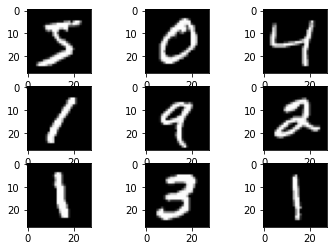

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))

# Normalizing the inputs

In [0]:
images,labels = (x_train.reshape(len(x_train), 28*28)/255,y_train)

# One hot encoding

In [0]:
one_hot_labels = np.zeros((len(labels),10))

In [0]:
for i, l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels =one_hot_labels

In [0]:
test_images = x_test.reshape(len(x_test),28*28)/255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] =1

# Image augmentation

In [0]:

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
datagen = ImageDataGenerator()
datagen.fit(x_train)
os.makedirs('images6')


# Defining Nework Arhitecture Using 3 Neuron Layers (Input and Hidden layers)

In [0]:
np.random.seed(1)
batch_size = 100
def tanh(x):
  return np.tanh(x)
def tanh2deriv(output):
  return 1-(output**2)
relu = lambda x:(x>=0)*x
relu2deriv = lambda x:x>=0
def softmax(x):
   temp = np.exp(x)
   return temp/np.sum(temp,axis =1,keepdims =True)
alpha,iterations,hidden_size, pixels_per_image,num_labels =(0.01,300,300,784,10)
weights_0_1 = np.random.randn(pixels_per_image,hidden_size) * np.sqrt(2.0/hidden_size)
weights_1_2 = np.random.randn(hidden_size,100)*np.sqrt(2.0/100)
weights_2_3 = np.random.randn(100,num_labels)*np.sqrt(2.0/num_labels)


# Implementing Minibatch gradient descent along with appropriate learning rate and various dropout rates.

In [9]:
for j in range (iterations):
  correct_cnt = 0
  error =0.0
  for i in range(int(len(images)/batch_size)):
    batch_start,batch_end = ((i*batch_size),((i+1)*batch_size))
    layer_0=images[batch_start:batch_end]
    layer_1=tanh(np.dot(layer_0,weights_0_1))
    dropout_mask = np.random.randint(2,size=layer_1.shape)
    layer_1 *= dropout_mask*2
    layer_2 = relu(np.dot(layer_1,weights_1_2))
    layer_3 = softmax(np.dot(layer_2,weights_2_3))
    error+=np.sum((labels[batch_start:batch_end]-layer_3)**2)
   

    for k in range (batch_size):
      correct_cnt+=int(np.argmax(layer_3[k:k+1])==np.argmax(labels[batch_start+k:batch_start+k+1]))
    layer_3_delta = (labels[batch_start:batch_end]-layer_3)/(batch_size * layer_3.shape[0])
    layer_2_delta = layer_3_delta.dot(weights_2_3.T)*relu2deriv(layer_2)
   
    layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
    layer_1_delta *= dropout_mask


    weights_2_3 += alpha*layer_2.T.dot(layer_3_delta)
    weights_1_2 += 0.1*layer_1.T.dot(layer_2_delta)
    weights_0_1 += 0.2*layer_0.T.dot(layer_1_delta)
  test_correct_cnt = 0
  y_pred1=[]
  act_labels=[]

  for i in range (len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_1 = tanh(np.dot(layer_0,weights_0_1))
    layer_2 = relu(np.dot(layer_1,weights_1_2))
    layer_3 = np.dot(layer_2,weights_2_3)
    y_pred1 += [int(np.argmax(layer_3))]
    act_labels += [np.argmax(test_labels[i:i+1])]
    test_correct_cnt += int(np.argmax(layer_3)==np.argmax(test_labels[i:i+1]))
   
  if (j%10==0 or j==iterations-1):
   sys.stdout.write("\n"+"I:"+str(j)+" Test- Acc:"+str(test_correct_cnt/float(len(test_images)))+" Train-Acc:"+'{:0.6f}'.format(correct_cnt/float(len(images))))
  
  


I:0 Test- Acc:0.7109Train-Acc:0.368417
I:10 Test- Acc:0.8783Train-Acc:0.799350
I:20 Test- Acc:0.8923Train-Acc:0.825667
I:30 Test- Acc:0.8948Train-Acc:0.832967
I:40 Test- Acc:0.896Train-Acc:0.837483
I:50 Test- Acc:0.8995Train-Acc:0.839433
I:60 Test- Acc:0.9016Train-Acc:0.842600
I:70 Test- Acc:0.9026Train-Acc:0.841883
I:80 Test- Acc:0.9015Train-Acc:0.843233
I:90 Test- Acc:0.9044Train-Acc:0.845667
I:100 Test- Acc:0.9053Train-Acc:0.848267
I:110 Test- Acc:0.9062Train-Acc:0.849183
I:120 Test- Acc:0.9074Train-Acc:0.850783
I:130 Test- Acc:0.9086Train-Acc:0.851483
I:140 Test- Acc:0.9107Train-Acc:0.851150
I:150 Test- Acc:0.9139Train-Acc:0.853600
I:160 Test- Acc:0.9148Train-Acc:0.854100
I:170 Test- Acc:0.915Train-Acc:0.854983
I:180 Test- Acc:0.9151Train-Acc:0.856050
I:190 Test- Acc:0.9165Train-Acc:0.857050
I:200 Test- Acc:0.9177Train-Acc:0.857067
I:210 Test- Acc:0.9192Train-Acc:0.856850
I:220 Test- Acc:0.9193Train-Acc:0.858433
I:230 Test- Acc:0.9199Train-Acc:0.857867
I:240 Test- Acc:0.9225Train-

# Accuracy of Neural Network:
Test Accuracy - 92 %, Train Accuracy - 86% with 300 epoch

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(act_labels,y_pred1)*100

92.27

# Evaluating The Model with Confusion Matrix

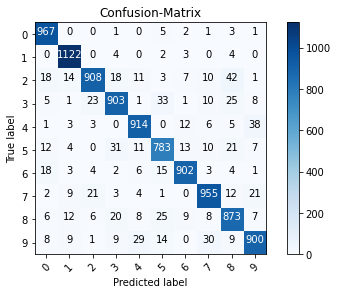

In [20]:


# Plotting Confusion Matrics
import matplotlib.pyplot as plt
import itertools
def plot_conf_mat(cm,classes,
                  normalize=False,
                  title='Confusion-Matrix', 
                  cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i, cm[i,j],horizontalalignment="center",color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

#Computing-Confusion Matrix
conf_mat = confusion_matrix(act_labels, y_pred1)

#plotting conf matrix
plot_conf_mat(conf_mat, classes = range(10))